**데이터 거리?**

<br>

- k개의 변수, 이들의 거리를 어떻게 구할까?
    - 각 변수간의 거리를 행렬 형태로 표현하자. 이것이 거리 행렬.
    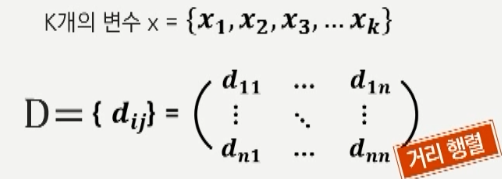
    - i행 j열. 데이터 i와 데이터 j의 거리를 구하는 것.
- 거리 행렬은 어떻게 만들까? 거리를 어떻게 측정할지 먼저 정의해야 함. 수식으로 나타낼 수 있게.
- 보통 **유클리드 거리(두 점 사이의 거리)**, **맨하튼 거리(절대값)**, **민코프스키 거리** 를 많이 씀.

**군집분석의 종류?**

<br>

- **Dendrogram** : 거리행렬을 통해 데이터 포인트를 모두 계산. **계층적 군집**의 일종.
    - 어느 데이터가 서로 가까운지 쉽게 볼 수 있음.
    - 군집이 어떻게 형성되는지, 몇 개의 군집이 형성되는지 직관적으로 확인이 가능.
    - 단점? 
        - 많은 메모리가 필요.
        - 큰 규모의 데이터에서 사용하기가 힘듬.
    - 본격적인 군집을 하기 전, 간단하게 둘러보는 용도로도 사용.
    
<br>
    
- **K-means** : **데이터끼리의 평균 벡터** 이용. 평균계산을 사용해 군집 계산. **비계층적 군집**의 일종.
    - 군집의 평균을 매번 계산, 그 중심이 움직이지 않을 때 까지 군집을 결정하는 방법.
    - 단점?
        - 원/구 와 같은 원 형태의 군집에 최적화 되어있음. 길쭉한 형태의 군집을 잘 못잡음.
    
<br>    
    
- **DBSCAN** : **밀도가 높은 부분을 군집으로** 평가. 밀도가 높을수록 군집 형성. **비계층적 군집**의 일종.
    - 길쭉한 형태의 군집을 잘 잡아낼 수 있음.
    - 노이즈(어떤 군집에도 속하지 않는 데이터)를 자동으로 잡아낼 수 있음.

**군집 간 거리는 어떻게?**

<br>

1. **최단연결법 (Single Linkage)** : 양 군집의 모든 데이터들 간 거리 中 최소가 되는 거리 선택.

2. **최장연결법 (Complete Linkage)** : 최단연결법의 반대. 최대가 되는 거리 선택.

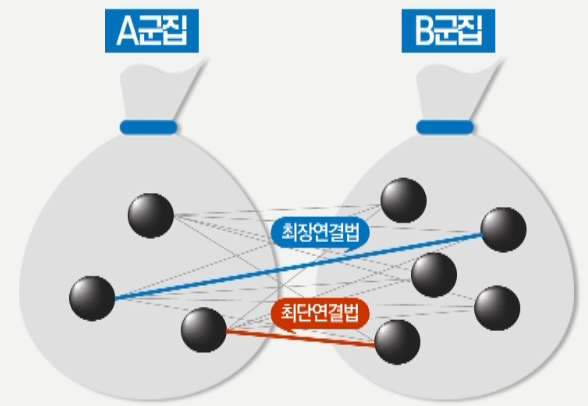

                                                                            간단히 말해 이런 식으로.
    
3. **평균연결법 (Average Linkage)** : 군집에 있는 모든 데이터와, 다른 군집에 있는 모든 데이터의 거리를 계산, 그 **평균 거리**를 선택.

4. **중심연결법 (Centroid Linkage)** : 각 군집의 **중심 데이터(평균벡터)를 먼저 구한 후**, **중심 데이터간의 거리** 선택.
    - 이때 **거리는 군집의 크기에 따른 가중평균을 고려**, 해당 거리를 선택. 
    
5. **와드연결법 (Ward Linkage)** : 2개의 군집을 하나로 합친 후, 늘어나는 오차제곱합의 크기를 거리로 선택.
    - 각각의 **군집별로 중심과의 거리 제곱합을 계산**.
    - 군집을 합칠 때 **오차제곱합 거리가 가장 최소가 되는 방향으로** 합침.
    
---------

* 군집 간 거리를 정의하는 이 5가지 방법의 공통점?

                   가장 짧은 거리의 군집을 결합하면서, 서로 하나씩 합쳐 나감.

**K-means 흐름도**

<br>

1. 임의의 학습 데이터를 평균 벡터로 설정. 즉, 군집 중심을 초기에 설정. random으로.
2. 군집 중심으로부터 모든 점까지의 거리를 계산, 각각의 점에 해당되는 가장 가까운 군집 확인 후 할당.
3. 같은 군집으로 속한 데이터들 끼리 평균 벡터 계산. 이전의 중심과 위치가 달라질 것.
4. 변동된 중심과 모든 데이터들간 거리 계산. 이 과정을 반복.
5. 중심의 변동이 거의 없어질 때 작업 중단.
    - 이 때의 중심이 형성된 군집의 중심일 것이고, 데이터들은 우리가 원하는 군집으로 나뉘어 진 형태.
    
<br>

            이때, 초기 군집의 갯수 K는 학습 시작 전 우리가 설정해줘야 하는 값.
            정답인 군집 갯수는 없지만, 시각화나 EDA를 통해 대략적으로 유추해 볼 수 있음.

## K-means

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Iris 데이터 Load
iris = datasets.load_iris()
data = iris['data']

In [8]:
# 데이터는 어떻게 생겼을까.
print(data)
print(data.shape)
print(type(data))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [9]:
# 바로 학습
model = KMeans(n_clusters=3)
model.fit(data)

# 결과 label을 얻어보자.
labels = model.labels_
labels # 각 data마다 어떤 군집에 속하는지 확인할 수 있음. 3개로 설정했으니 0, 1, 2가 될 것.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

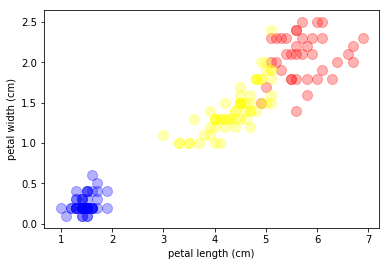

In [10]:
# 결과로 받은 label을 시각화해서 군집이 어떻게 생겼는지 봐보자.
ldata = data[labels==0]
plt.scatter(ldata[:, 2], ldata[:, 3], c='red', alpha='0.3', s=100, marker='o')
ldata2 = data[labels==1]
plt.scatter(ldata2[:, 2], ldata2[:, 3], c='blue', alpha='0.3', s=100, marker='o')
ldata3 = data[labels==2]
plt.scatter(ldata3[:, 2], ldata3[:, 3], c='yellow', alpha='0.3', s=100, marker='o')

# 축 label 설정
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.show()

In [11]:
# 실제 target값과 모델이 예측한 label이 얼마나 같을까.
iris['target'] == labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,

    생성한 군집과 실제 target은 큰 연관이 없음을 유추해 볼 수 있음.

## 계층적 군집

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

# Data Loading
iris = datasets.load_iris()
data = iris['data']

In [18]:
# 계층형 클러스터 생성. 거리 연결은 와드 연결법 선택.
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(data)

# label 예측?
labels = model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

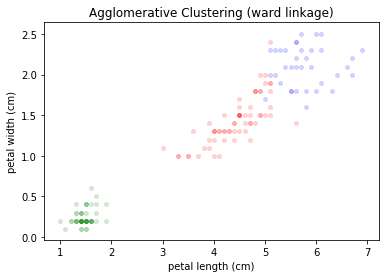

In [19]:
x_index = 2
y_index = 3

data_x = data[:, x_index]
data_y = data[:, y_index]

x_label = iris['feature_names'][x_index]
y_label = iris['feature_names'][y_index]

plt.scatter(data_x[labels==0], data_y[labels==0], c='red', alpha=0.15, s=15, marker='o')
plt.scatter(data_x[labels==1], data_y[labels==1], c='green', alpha=0.15, s=15, marker='o')
plt.scatter(data_x[labels==2], data_y[labels==2], c='blue', alpha=0.15, s=15, marker='o')

plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.title('Agglomerative Clustering (ward linkage)')
plt.show()

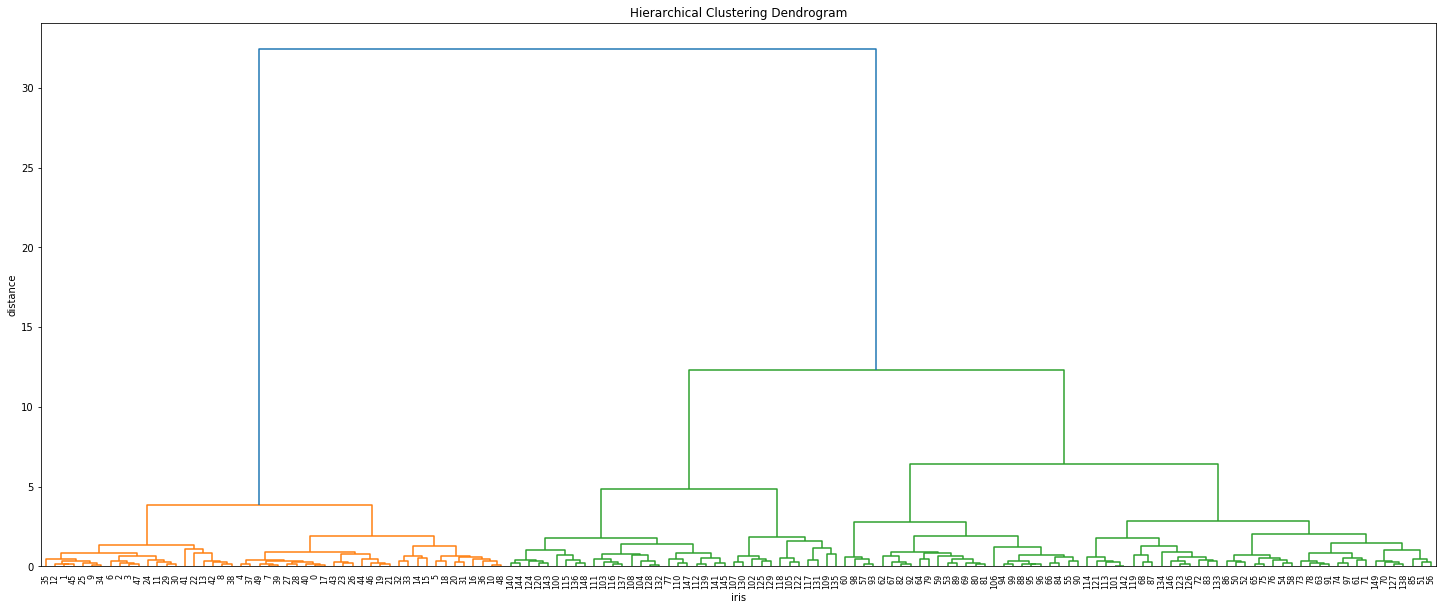

In [21]:
# 어떻게 연결되었나? Dendrogram을 그려보자.
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data, 'ward') # 거리 정의.

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('iris')
plt.ylabel('distance')

dendrogram(
    Z,
    leaf_rotation = 90., # x축 label 회전
    leaf_font_size = 8., # x 축 label 폰트 크기 설정
)
plt.show()

## 임의의 데이터 이용

In [41]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster

plt.style.use('ggplot')

academy = pd.read_csv('UseData/academy.csv')
academy.head()

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90


In [42]:
# 컬럼 명을 바꾸자.
academy.columns = ['num', 'kor', 'math', 'eng', 'sci', 'itn']
academy = academy.drop('num', axis=1)
academy.head()

,kor,math,eng,sci,itn
0,90,75,85,60,70
1,65,90,60,88,80
2,45,53,48,50,60
3,77,96,62,92,70
4,88,89,80,82,90


In [43]:
# 군집분석을 수행하기 위해선 DataFrame형이 아닌 ndarray형이어야 함.
academy_arr = np.array(academy)
print(academy_arr)
print(academy_arr.shape)

[[ 90  75  85  60  70]
 [ 65  90  60  88  80]
 [ 45  53  48  50  60]
 [ 77  96  62  92  70]
 [ 88  89  80  82  90]
 [ 90  92  90  96 100]
 [ 65  70  66  76  70]
 [ 60  90  70  98  80]
 [ 46  56  43  55  60]
 [ 88  67  90  70  70]
 [ 70  93  77  89  60]
 [ 99  80  95  70  80]
 [ 97  67  80  60  80]
 [ 50  40  30  54  50]
 [ 90  77  92  60  70]
 [ 55  88  67  92  60]
 [ 77  90  70  98  70]
 [ 90  89  80  92  90]
 [ 76  90  80  92  70]
 [ 70  92  80  95  70]
 [ 76  75  70  82  80]
 [ 77  92  68  89  80]
 [ 60  50  70  40  60]
 [ 54  70  56  72  60]
 [ 72  88  67  95  80]
 [ 58  76  59  80  70]
 [ 88  60  76  58  60]
 [ 84  88  90  92  90]
 [ 45  76  56  78  70]
 [ 76  54  70  58  70]
 [ 66  90  70  88  70]
 [ 88  80  85  88  90]
 [ 71  48  69  50  80]
 [ 90  77  82  65  80]
 [ 34  32  45  50  50]
 [ 56  78  67  89  60]
 [ 70  95  72  80  70]
 [ 93  90  89  91  90]
 [ 92  97  90  89  80]
 [ 56  63  70  71  70]
 [ 88  57  78  60  80]
 [ 90  92  88  94  90]
 [ 91  67  89  70  60]
 [ 58  77  

In [44]:
# 모델 생성 및 학습
model = cluster.KMeans(n_clusters=5) # 군집수는 임의로.
model.fit(academy_arr)

# label 획득
labels = model.labels_
labels

array([3, 4, 1, 4, 2, 2, 0, 4, 1, 3, 4, 3, 3, 1, 3, 0, 4, 2, 4, 4, 4, 4,
       1, 0, 4, 0, 3, 2, 0, 3, 4, 2, 1, 3, 1, 0, 4, 2, 2, 0, 3, 2, 3, 0,
       1, 4, 3, 0, 2, 1, 1, 4])

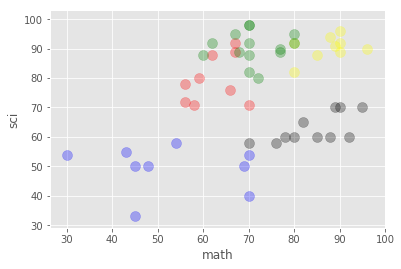

In [45]:
# 군집이 어떻게 형성되었는지 확인해보자.
colors = ['red', 'blue', 'yellow', 'black', 'green']
for i in range(len(colors)) :
    ldata = academy_arr[labels == i]
    plt.scatter(ldata[:, 2], ldata[:, 3], c=colors[i], alpha=0.3, s=100, marker='o')

# 축을 임의로 설정. math와 sci.
plt.xlabel(academy.columns[1])
plt.ylabel(academy.columns[3])
plt.show()

C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


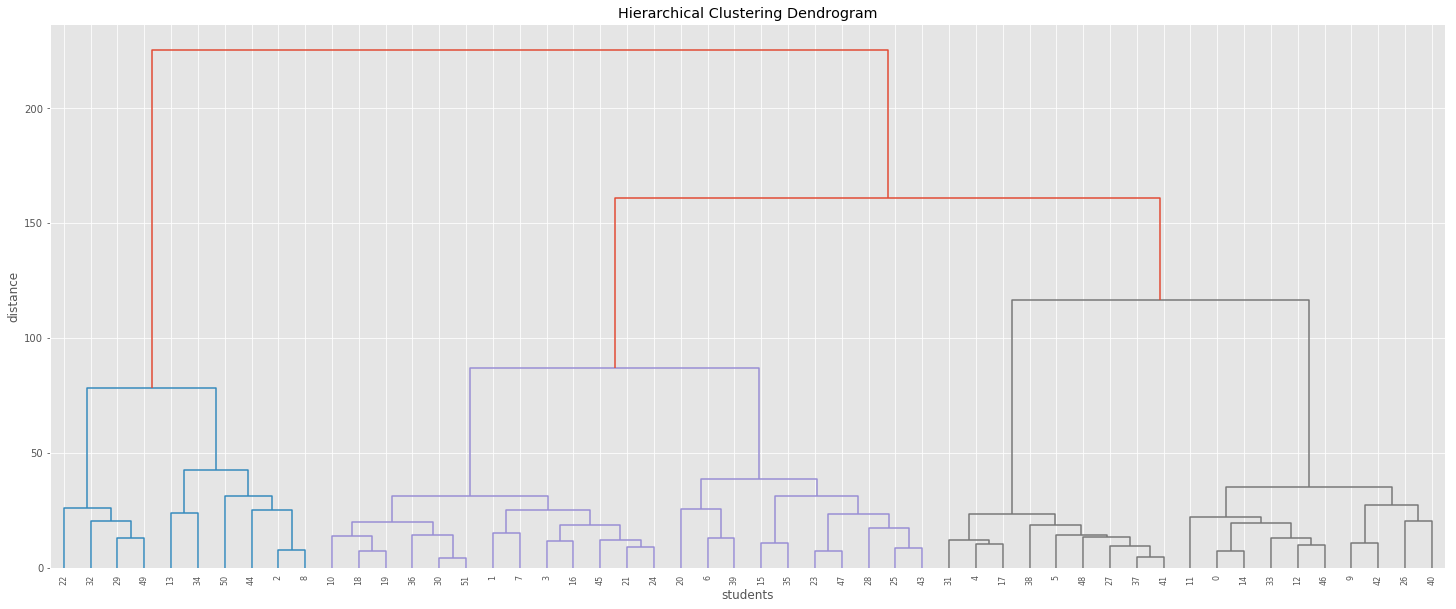

In [46]:
# 덴드로그램으로도 확인해보자.
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(academy_arr, 'ward') # 거리 정의.

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('students')
plt.ylabel('distance')

dendrogram(
    Z,
    leaf_rotation = 90., # x축 label 회전
    leaf_font_size = 8., # x 축 label 폰트 크기 설정
)
plt.show()

    거리 100을 기준으로 하면 군집 3개가 적당해 보임.
    거리 50을 기준으로 하면 군집 5개가 적당해보임.
    
    3개인 경우는 어떻게 될까?

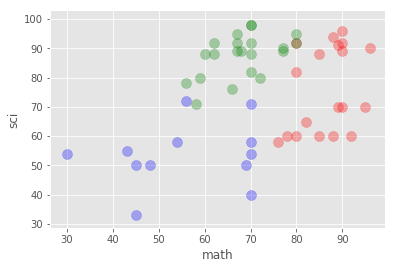

In [47]:
# 덴드로그램으로 확인한 군집 수로 k 설정.
model = cluster.KMeans(n_clusters=3)
model.fit(academy_arr)

# label 획득
labels = model.labels_

# 군집이 어떻게 형성되었는지 확인해보자.
colors = ['red', 'blue', 'green']
for i in range(len(colors)) :
    ldata = academy_arr[labels == i]
    plt.scatter(ldata[:, 2], ldata[:, 3], c=colors[i], alpha=0.3, s=100, marker='o')

# 축을 임의로 설정. math와 sci.
plt.xlabel(academy.columns[1])
plt.ylabel(academy.columns[3])
plt.show()

    5개일때 보다 잘 잡힌것 같기도 하고... 아닌 것 같기도 하고...